<a href="https://colab.research.google.com/github/Soni-Shivam/Finsearch/blob/main/Copy_of_FinSearch_F8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trading indicators(for state)

In [2]:
def calculate_macd(series, fast=12, slow=26, signal=9):
    exp1 = series.ewm(span=fast, adjust=False).mean()
    exp2 = series.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    histogram = macd - signal_line
    return macd, signal_line, histogram

In [3]:

def calculate_bollinger_bands(Close, window=20):
    rolling_mean = Close.rolling(window=window).mean()
    rolling_std = Close.rolling(window=window).std()

    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)
    return upper_band, lower_band

In [4]:
def calculate_ema(series, span):
    return series.ewm(span=span, adjust=False).mean()

In [5]:
def calculate_rsi(Close, period=14):
    delta = Close.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    rsi[avg_loss == 0] = 100

    return rsi

In [6]:
# for ticker, df in data.items():
#     df = df.copy()

#     # Add indicators
#     df['EMA_10'] = calculate_ema(df['close'], span=10)
#     df['EMA_20'] = calculate_ema(df['close'], span=20)
#     df['RSI_14'] = calculate_rsi(df['close'])
#     df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = calculate_macd(df['close'])
#     df['BB_Upper'], df['BB_Lower'] = calculate_bollinger_bands(df['close'])
#     df.dropna(inplace=True)

#     data[ticker] = df

In [7]:
# # To install the library
# !pip install pmdarima --no-deps # Let pip handle numpy version

# # Import the library
# from pmdarima import auto_arima

# # Ignore harmless warnings
# import warnings
# warnings.filterwarnings("ignore")

In [8]:
# # Select a ticker to forecast
# ticker_to_forecast = 'RELIANCE.NS'
# df_forecast = data[ticker_to_forecast]

# # Use auto_arima to find the best ARIMA model
# # We will use the 'Close' price for forecasting
# model = auto_arima(df_forecast['Close'], seasonal=True, suppress_warnings=True)

# # Print the model summary
# print(model.summary())

In [9]:
# !pip install gym-trading-env
# import gymnasium as gym
# import gym_trading_env

In [10]:
# # since df is a DataFrame with columns : "Open", "High", "Low", "Close", "Volume"
# # give it the static features

# # Create the feature : ( Close[t] - Close[t-1] )/ Close[t-1]
# df["feature_Close"] = df["Close"].pct_change()

# # Create the feature : open[t] / Close[t]
# df["feature_open"] = df["Open"]/df["Close"]

# # Create the feature : high[t] / Close[t]
# df["feature_high"] = df["High"]/df["Close"]

# # Create the feature : low[t] / Close[t]
# df["feature_low"] = df["Low"]/df["Close"]

#  # Create the feature : volume[t] / max(*volume[t-7*24:t+1])
# df["feature_volume"] = df["Volume"] / df["Volume"].rolling(7).max()
# # DO HAVE

# df.dropna(inplace= True) # Clean again !
# # Eatch step, the environment will return 5 inputs  : "feature_Close", "feature_open", "feature_high", "feature_low", "feature_volume"

In [11]:
def add_technical_indicators(df, tech_indicator_list):
    """
    Calculate and add technical indicators to the DataFrame using custom functions.
    This function processes each stock (tic) independently to ensure indicators
    are calculated correctly without data leakage between stocks.

    :param df: (pd.DataFrame) Must contain 'date', 'tic', 'open', 'high', 'low', 'close', 'volume'
    :param tech_indicator_list: (list) A list of indicator names to be calculated.
    :return: (pd.DataFrame) The original DataFrame with indicator columns added.
    """

    # --- Custom Indicator Functions (Nested for encapsulation) ---
    def calculate_macd(series, fast=12, slow=26, signal=9):
        """Calculates the MACD value."""
        exp1 = series.ewm(span=fast, adjust=False).mean()
        exp2 = series.ewm(span=slow, adjust=False).mean()
        macd = exp1 - exp2
        return macd

    def calculate_bollinger_bands(series, window=20):
        """Calculates the Upper and Lower Bollinger Bands."""
        rolling_mean = series.rolling(window=window).mean()
        rolling_std = series.rolling(window=window).std()
        upper_band = rolling_mean + (rolling_std * 2)
        lower_band = rolling_mean - (rolling_std * 2)
        return upper_band, lower_band

    def calculate_ema(series, span):
        """Calculates the Exponential Moving Average."""
        return series.ewm(span=span, adjust=False).mean()

    def calculate_rsi(series, period=14):
        """Calculates the Relative Strength Index (RSI)."""
        delta = series.diff()
        gain = delta.clip(lower=0).fillna(0)
        loss = -delta.clip(upper=0).fillna(0)
        avg_gain = gain.rolling(window=period, min_periods=1).mean()
        avg_loss = loss.rolling(window=period, min_periods=1).mean()
        rs = avg_gain / avg_loss
        # Handle division by zero
        rs = rs.replace([np.inf, -np.inf], np.nan).fillna(0)
        rsi = 100 - (100 / (1 + rs))
        return rsi

    df_copy = df.copy()
    # A list to store processed dataframes for each stock
    processed_dfs = []

    # Calculate indicators for each stock ticker to avoid look-ahead bias
    for tic in df_copy['tic'].unique():
        tic_df = df_copy[df_copy['tic'] == tic].copy()

        # Calculate each indicator if it's in the list
        if 'EMA_10' in tech_indicator_list:
            tic_df['EMA_10'] = calculate_ema(tic_df['close'], span=10)
        if 'EMA_20' in tech_indicator_list:
            tic_df['EMA_20'] = calculate_ema(tic_df['close'], span=20)
        if 'RSI_14' in tech_indicator_list:
            tic_df['RSI_14'] = calculate_rsi(tic_df['close'])

        if 'MACD' in tech_indicator_list:
            tic_df['MACD'] = calculate_macd(tic_df['close'])

        if 'BB_Upper' in tech_indicator_list and 'BB_Lower' in tech_indicator_list:
            tic_df['BB_Upper'], tic_df['BB_Lower'] = calculate_bollinger_bands(tic_df['close'])

        processed_dfs.append(tic_df)

    # Combine all processed dataframes back into one
    full_df = pd.concat(processed_dfs)

    # The first few rows for each stock will have NaN values from the rolling calculations.
    # We use the modern bfill() and ffill() methods to handle these.
    full_df.bfill(inplace=True)
    full_df.ffill(inplace=True)

    # Sort by date and ticker to ensure correct order
    return full_df.sort_values(by=['date', 'tic']).reset_index(drop=True)

In [12]:
import gymnasium as gym
from gymnasium import spaces
import pandas as pd
import numpy as np


## The GYm Env

In [13]:
class StockTradingEnv(gym.Env):
    """
    A simplified stock trading environment for reinforcement learning.

    This environment is designed to be easy to use and understand. It features:
    - A simplified, flat observation space.
    - Core trading logic for buying, selling, and holding.
    - Calculation of portfolio value and rewards.

    Action Space: A continuous Box space of shape (stock_dim,). Each value is in [-1, 1].
                  -1 represents a maximum sell order.
                   0 represents a hold order.
                  +1 represents a maximum buy order.

    Observation Space: A continuous Box space representing the state:
                       [balance] + [shares_held] + [stock_features]
    """
    metadata = {'render_modes': ['human']}

    def __init__(self, df, stock_dim, initial_balance, hmax=100,
                 transaction_cost_pct=0.001, reward_scaling=1e-4,
                 tech_indicator_list=['EMA_10', 'EMA_20', 'RSI_14', 'MACD', 'BB_Upper', 'BB_Lower'],
                 render_mode=None):
        super().__init__()

        self.df = df
        self.stock_dim = stock_dim
        self.initial_balance = initial_balance
        self.hmax = hmax
        self.transaction_cost_pct = transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.tech_indicator_list = tech_indicator_list
        self.render_mode = render_mode
        self.unique_trade_dates = self.df['date'].unique()

        # Define action space: continuous actions for each stock
        self.action_space = spaces.Box(low=-1, high=1, shape=(self.stock_dim,), dtype=np.float32)

        # Define observation space: a flattened vector for simplicity
        # Shape = 1 (balance) + stock_dim (shares) + stock_dim * num_features (market data)
        num_stock_features = 1 + len(self.tech_indicator_list) # Close price + indicators
        observation_space_shape = 1 + self.stock_dim + self.stock_dim * num_stock_features
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(observation_space_shape,), dtype=np.float32)

        # Initialize state variables
        self.day_index = 0
        self.balance = self.initial_balance
        self.shares_held = np.zeros(self.stock_dim, dtype=np.float32)
        self.portfolio_value = self.initial_balance
        self.episode_num = 0

    def update_episode(self):
      self.episode_num += 1

    def reset_episode(self):
      self.episode_num = 0

    def _get_obs(self):
        """
        Assembles the observation vector for the current state.
        The vector is flattened for easy use with standard RL models.
        """
        # Get market data for the current day
        day_data = self.df[self.df['date'] == self.unique_trade_dates[self.day_index]]
        stock_features = day_data[['close'] + self.tech_indicator_list].values.flatten()

        # Combine all parts into a single flat vector
        obs = np.concatenate(
            (
                [self.balance],
                self.shares_held,
                stock_features,
            ),
            dtype=np.float32,
        )
        return obs

    def reset(self, *, seed=None, options=None):
        super().reset(seed=seed)

        # Reset the environment to its initial state
        self.day_index = 0
        self.balance = self.initial_balance
        self.shares_held = np.zeros(self.stock_dim, dtype=np.float32)
        self.portfolio_value = self.initial_balance
        observation = self._get_obs()
        info = {'portfolio_value': self.portfolio_value}

        if self.render_mode == 'human':
            self.render()

        return observation, info

    def step(self, actions):
        # Store portfolio value at the beginning of the step to calculate reward later
        begin_portfolio_value = self.portfolio_value

        # --- Execute Trades ---
        # De-normalize actions from [-1, 1] to the desired number of shares to trade
        actions = (actions * self.hmax).astype(int)

        # Get current stock prices for the day
        current_prices = self.df[self.df['date'] == self.unique_trade_dates[self.day_index]]['close'].values

        # Process sell orders first to free up cash
        for i in range(self.stock_dim):
            if actions[i] < 0:
                # Ensure we don't sell more shares than we own
                sell_shares = min(abs(actions[i]), self.shares_held[i])
                sell_value = current_prices[i] * sell_shares

                self.shares_held[i] -= sell_shares
                self.balance += sell_value * (1 - self.transaction_cost_pct)

        # Process buy orders
        for i in range(self.stock_dim):
            if actions[i] > 0:
                buy_shares = actions[i]
                buy_cost = current_prices[i] * buy_shares

                # Ensure we have enough balance to make the purchase
                if self.balance >= buy_cost:
                    self.shares_held[i] += buy_shares
                    self.balance -= buy_cost * (1 + self.transaction_cost_pct)

        # --- Advance Time and Update State ---
        self.day_index += 1

        # Check for termination conditions
        # Terminate when the day_index reaches the total number of unique trade dates
        terminated = self.day_index >= (len(self.unique_trade_dates) - 1)


        # Update portfolio value based on the new day's prices
        if not terminated:
            new_prices = self.df[self.df['date'] == self.unique_trade_dates[self.day_index]]['close'].values
            self.portfolio_value = self.balance + np.sum(self.shares_held * new_prices)

        else:
            # On the last day, use the final prices to calculate value
            # If terminated, the day_index is already one beyond the last valid index.
            # Need to use the prices from the *last* trading day (day_index - 1).
            final_prices = self.df[self.df['date'] == self.unique_trade_dates[self.day_index - 1]]['close'].values
            self.portfolio_value = self.balance + np.sum(self.shares_held * final_prices)


        # An episode is truncated if the agent goes bankrupt
        truncated = self.portfolio_value <= 0

        # --- Calculate Reward ---
        # The reward is the change in portfolio value
        reward = self.portfolio_value - begin_portfolio_value - self.transaction_cost_pct
        reward = reward * self.reward_scaling # Scale reward for more stable training

        # Get the new observation and info dictionary
        # If terminated, the observation should be the final state, but there's no "next" day data.
        # For simplicity in this basic environment, we'll return the observation from the last day.
        # A more complex environment might return a special terminal observation.
        observation = self._get_obs()


        info = {'portfolio_value': self.portfolio_value}

        if self.render_mode == 'human':
            self.render()

        return observation, reward, terminated, bool(truncated), info

    def render(self):
        if self.render_mode == 'human':
            print(f"Day: {self.day_index}")
            print(f"Portfolio Value: {self.portfolio_value:,.2f}")
            print(f"Balance: {self.balance:,.2f}")
            print(f"Shares Held: {self.shares_held.round(0)}")
            print(f"Episode Number: {self.episode_num}")
            print("-" * 30)

    def close(self):
        # No resources to clean up in this simple version
        pass

In [14]:
import yfinance as yf
print("Downloading real stock data...")

tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS']
start_date = "2010-01-01"
end_date = "2019-06-30"

# Download all tickers at once. yfinance returns a wide-format DataFrame
# with a MultiIndex for the columns: ('Open', 'TCS.NS'), ('Close', 'RELIANCE.NS'), etc.
df_wide = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)

# --- 2. Convert and Format the Data from Wide to Long Format ---
print("Processing and combining data...")

# Stack the 'Ticker' level of the columns to convert to a long format
# The result is a Series with a MultiIndex: (Date, Ticker)
df_stacked = df_wide.stack(level=1)

# Reset the index to turn the MultiIndex into columns 'Date' and 'Ticker'
df_long = df_stacked.reset_index()

# Rename columns to be compatible with the environment
df_long.rename(columns={
    'Date': 'date',
    'Ticker': 'tic',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adj close',
    'Volume': 'volume'
}, inplace=True)

# Ensure data types are correct
df_long['date'] = pd.to_datetime(df_long['date'])

# Sort the data by date and ticker, which is crucial for the environment
sample_df = df_long.sort_values(by=['date', 'tic']).reset_index(drop=True)

# Drop any rows with missing values in critical columns
sample_df.dropna(subset=['close', 'open', 'high', 'low', 'volume'], inplace=True)

print("Data successfully loaded and formatted.")
print("Sample of loaded data:")
print(sample_df.head())

# --- 3. Preprocess Data: Add Technical Indicators ---
print("\nAdding technical indicators...")
INDICATORS = ['EMA_10', 'RSI_14', 'MACD', 'BB_Upper', 'BB_Lower']
df_processed = add_technical_indicators(sample_df, tech_indicator_list=INDICATORS)

print("Data preprocessing complete.")
print("Sample of processed data with indicators:")
print(df_processed.head())

#80-20 train test split
train_size = int(len(df_processed) * 0.8)
df_train = df_processed[:train_size]
df_test = df_processed[train_size:]


# --- 4. Instantiate and Validate the Environment ---
print("\nInstantiating the trading environment...")
STOCK_DIM = len(tickers)
INITIAL_BALANCE = 1_000_000

stock_trading_env = StockTradingEnv(
    df=df_train,
    stock_dim=STOCK_DIM,
    initial_balance=INITIAL_BALANCE,
    tech_indicator_list=INDICATORS,
    render_mode='human' # Set to 'human' to see output, or None for silent training
)

# Validate the environment using Gymnasium's checker
# This is a crucial step to ensure the environment follows the standard API
try:
    from gymnasium.utils.env_checker import check_env
    print("\nValidating the environment...")
    check_env(stock_trading_env)
    print("Environment check passed!")
except Exception as e:
    print(f"\nEnvironment check failed: {e}")

# --- 5. Test the Environment with Random Actions ---
print("\nTesting the environment with random actions for 5 steps...")
obs, info = stock_trading_env.reset()
for _ in range(100):
    action = stock_trading_env.action_space.sample() # Take a random action
    obs, reward, terminated, truncated, info = stock_trading_env.step(action)

    if terminated or truncated:
        print("  Episode finished early.")
        break


[*********************100%***********************]  3 of 3 completed
/tmp/ipython-input-997964051.py:17: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_stacked = df_wide.stack(level=1)
/usr/local/lib/python3.11/dist-packages/gymnasium/utils/env_checker.py:311: UserWarning: WARN: A Box observation space minimum value is -infinity. This is probably too low.
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/utils/env_checker.py:315: UserWarning: WARN: A Box observation space maximum value is infinity. This is probably too high.
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/utils/passive_env_checker.py:334: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at 

Processing and combining data...
Data successfully loaded and formatted.
Sample of loaded data:
Price       date          tic   adj close       close        high         low  \
0     2010-01-04      INFY.NS  233.268616  326.575012  328.750000  324.412506   
1     2010-01-04  RELIANCE.NS  218.593094  245.841202  249.407104  233.577728   
2     2010-01-04       TCS.NS  295.397308  375.825012  379.450012  374.524994   
3     2010-01-05      INFY.NS  234.049881  327.668762  328.837494  325.012512   
4     2010-01-05  RELIANCE.NS  217.617538  244.744003  262.847809  243.532516   

Price        open    volume  
0      326.250000   4069264  
1      249.407104  76646086  
2      377.399994   1963682  
3      327.500000   6895528  
4      262.847809  21392825  

Adding technical indicators...
Data preprocessing complete.
Sample of processed data with indicators:
Price       date          tic   adj close       close        high         low  \
0     2010-01-04      INFY.NS  233.268616  326.575012

# **Implementing the PPO Algorithm**

In [17]:
import math
import random
from dataclasses import dataclass
from typing import List, Tuple

import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# -------------------------------
# Minimal, fast PPO (continuous)
# Env: Pendulum-v1 by default
# PyTorch-only, single file, CPU-friendly
# -------------------------------


def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)


class MLPActorCritic(nn.Module):
    def __init__(self, obs_dim: int, act_dim: int, hidden: int = 64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_dim, hidden), nn.Tanh(),
            nn.Linear(hidden, hidden), nn.Tanh()
        )
        self.mu = nn.Linear(hidden, act_dim)
        self.log_std = nn.Parameter(torch.zeros(act_dim))
        self.v = nn.Linear(hidden, 1)

    def forward(self, x):
        h = self.net(x)
        return self.mu(h), self.log_std, self.v(h)

    @torch.no_grad()
    def act(self, obs: torch.Tensor):
        mu, log_std, value = self.forward(obs)
        std = log_std.exp()
        dist = torch.distributions.Normal(mu, std)
        action = dist.sample()
        logp = dist.log_prob(action).sum(axis=-1)
        return action, logp, value.squeeze(-1)


@dataclass
class Rollout:
    obs: List[np.ndarray]
    acts: List[np.ndarray]
    logps: List[float]
    rews: List[float]
    dones: List[bool]
    vals: List[float]
    next_obs: np.ndarray
    next_val: float


def compute_gae(roll: Rollout, gamma: float, lam: float):
    rews = np.array(roll.rews, dtype=np.float32)
    dones = np.array(roll.dones, dtype=np.bool_)
    vals = np.array(roll.vals + [roll.next_val], dtype=np.float32)
    adv = np.zeros_like(rews, dtype=np.float32)
    gae = 0.0
    for t in reversed(range(len(rews))):
        delta = rews[t] + gamma * vals[t + 1] * (1.0 - float(dones[t])) - vals[t]
        gae = delta + gamma * lam * (1.0 - float(dones[t])) * gae
        adv[t] = gae
    ret = adv + vals[:-1]
    return adv, ret


class PPO:
    def __init__(self, obs_dim, act_dim, lr=3e-4, clip_ratio=0.2, vf_coef=0.5, ent_coef=0.0, max_grad_norm=0.5, hidden=64, device="cpu"):
        self.device = torch.device(device)
        self.ac = MLPActorCritic(obs_dim, act_dim, hidden).to(self.device)
        self.opt = optim.Adam(self.ac.parameters(), lr=lr)
        self.clip_ratio = clip_ratio
        self.vf_coef = vf_coef
        self.ent_coef = ent_coef
        self.max_grad_norm = max_grad_norm

    def update(self, batch, epochs, minibatch_size):
        obs = torch.as_tensor(batch["obs"], dtype=torch.float32, device=self.device)
        acts = torch.as_tensor(batch["acts"], dtype=torch.float32, device=self.device)
        old_logps = torch.as_tensor(batch["logps"], dtype=torch.float32, device=self.device)
        advs = torch.as_tensor(batch["advs"], dtype=torch.float32, device=self.device)
        rets = torch.as_tensor(batch["rets"], dtype=torch.float32, device=self.device)

        advs = (advs - advs.mean()) / (advs.std() + 1e-8)
        n = obs.shape[0]
        idxs = np.arange(n)

        for _ in range(epochs):
            np.random.shuffle(idxs)
            for start in range(0, n, minibatch_size):
                mb = idxs[start:start+minibatch_size]
                mu, log_std, values = self.ac(obs[mb])
                std = log_std.exp()
                dist = torch.distributions.Normal(mu, std)
                logps = dist.log_prob(acts[mb]).sum(axis=-1)
                entropy = dist.entropy().sum(axis=-1).mean()
                ratio = (logps - old_logps[mb]).exp()
                unclipped = ratio * advs[mb]
                clipped = torch.clamp(ratio, 1.0 - self.clip_ratio, 1.0 + self.clip_ratio) * advs[mb]
                policy_loss = -torch.min(unclipped, clipped).mean()
                value_loss = nn.functional.mse_loss(values.squeeze(-1), rets[mb])
                loss = policy_loss + self.vf_coef * value_loss - self.ent_coef * entropy
                self.opt.zero_grad(set_to_none=True)
                loss.backward()
                nn.utils.clip_grad_norm_(self.ac.parameters(), self.max_grad_norm)
                self.opt.step()

    @torch.no_grad()
    def act(self, obs_t: torch.Tensor):
        return self.ac.act(obs_t)


def collect_rollout(env, agent, n_steps, obs, gamma):
    obs_buf, act_buf, logp_buf, rew_buf, done_buf, val_buf = [], [], [], [], [], []
    for _ in range(n_steps):
        obs_t = torch.as_tensor(obs, dtype=torch.float32, device=agent.device).unsqueeze(0)
        action, logp, value = agent.act(obs_t)
        action_np = action.cpu().numpy()[0]
        next_obs, reward, terminated, truncated, _ = env.step(action_np)
        done = terminated or truncated
        obs_buf.append(obs)
        act_buf.append(action_np)
        logp_buf.append(float(logp.item()))
        rew_buf.append(float(reward))
        done_buf.append(bool(done))
        val_buf.append(float(value.item()))
        obs = next_obs
        if done:
            obs, _ = env.reset()
    obs_t = torch.as_tensor(obs, dtype=torch.float32, device=agent.device).unsqueeze(0)
    _, _, next_val = agent.act(obs_t)
    return Rollout(obs_buf, act_buf, logp_buf, rew_buf, done_buf, val_buf, obs, float(next_val.item()))


def make_batch(roll, gamma, lam):
    adv, ret = compute_gae(roll, gamma, lam)
    return {
        "obs": np.array(roll.obs, dtype=np.float32),
        "acts": np.array(roll.acts, dtype=np.float32),
        "logps": np.array(roll.logps, dtype=np.float32),
        "advs": adv.astype(np.float32),
        "rets": ret.astype(np.float32)
    }


def train(env_id="Pendulum-v1", total_timesteps=200_000, n_steps=2048, batch_epochs=10, minibatch_size=64, gamma=0.99, gae_lambda=0.95, seed=42, device="cuda"):
    set_seed(seed)
    env = stock_trading_env
    obs, _ = env.reset(seed=seed)
    env.reset_episode()
    obs_dim = env.observation_space.shape[0]
    act_dim = env.action_space.shape[0]
    agent = PPO(obs_dim, act_dim, device=device)
    steps_collected = 0
    while steps_collected < total_timesteps:
        roll = collect_rollout(env, agent, n_steps, obs, gamma)
        obs = roll.next_obs
        batch = make_batch(roll, gamma, gae_lambda)
        agent.update(batch, epochs=batch_epochs, minibatch_size=minibatch_size)
        steps_collected += n_steps
        stock_trading_env.update_episode()
        if steps_collected % (n_steps * 10) == 0:
            print(f"Steps {steps_collected}")
    env.close()


if __name__ == "__main__":
    train(n_steps=len(df_train))


Streaming output truncated to the last 5000 lines.
Episode Number: 0
------------------------------
Day: 1277
Portfolio Value: 910,812.10
Balance: 9,472.37
Shares Held: [ 162. 4088.    0.]
Episode Number: 0
------------------------------
Day: 1278
Portfolio Value: 901,333.39
Balance: 61,657.73
Shares Held: [  96. 4007.    0.]
Episode Number: 0
------------------------------
Day: 1279
Portfolio Value: 898,353.82
Balance: 124,249.61
Shares Held: [  12. 3923.    0.]
Episode Number: 0
------------------------------
Day: 1280
Portfolio Value: 907,184.83
Balance: 13,606.64
Shares Held: [ 206. 3947.    0.]
Episode Number: 0
------------------------------
Day: 1281
Portfolio Value: 894,686.42
Balance: 48,441.19
Shares Held: [ 126. 3995.    0.]
Episode Number: 0
------------------------------
Day: 1282
Portfolio Value: 888,639.72
Balance: 43,151.90
Shares Held: [ 118. 4045.    0.]
Episode Number: 0
------------------------------
Day: 1283
Portfolio Value: 902,208.68
Balance: 8,939.56
Shares Hel

KeyboardInterrupt: 

--- Starting Agent Training ---
  Timesteps collected: 1871/50000
  Timesteps collected: 3742/50000
  Timesteps collected: 5613/50000
  Timesteps collected: 7484/50000
  Timesteps collected: 9355/50000
  Timesteps collected: 11226/50000
  Timesteps collected: 13097/50000
  Timesteps collected: 14968/50000
  Timesteps collected: 16839/50000
  Timesteps collected: 18710/50000
  Timesteps collected: 20581/50000
  Timesteps collected: 22452/50000
  Timesteps collected: 24323/50000
  Timesteps collected: 26194/50000
  Timesteps collected: 28065/50000
  Timesteps collected: 29936/50000
  Timesteps collected: 31807/50000
  Timesteps collected: 33678/50000
  Timesteps collected: 35549/50000
  Timesteps collected: 37420/50000
  Timesteps collected: 39291/50000
  Timesteps collected: 41162/50000
  Timesteps collected: 43033/50000
  Timesteps collected: 44904/50000
  Timesteps collected: 46775/50000
  Timesteps collected: 48646/50000
  Timesteps collected: 50517/50000
--- Training Complete ---

-

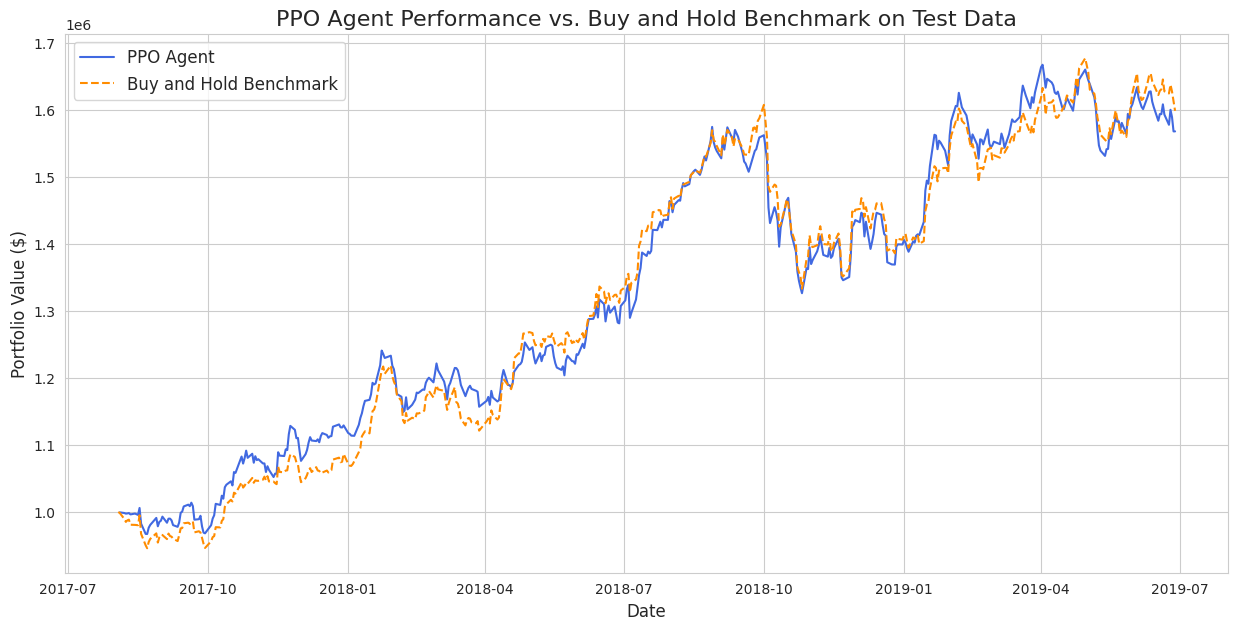

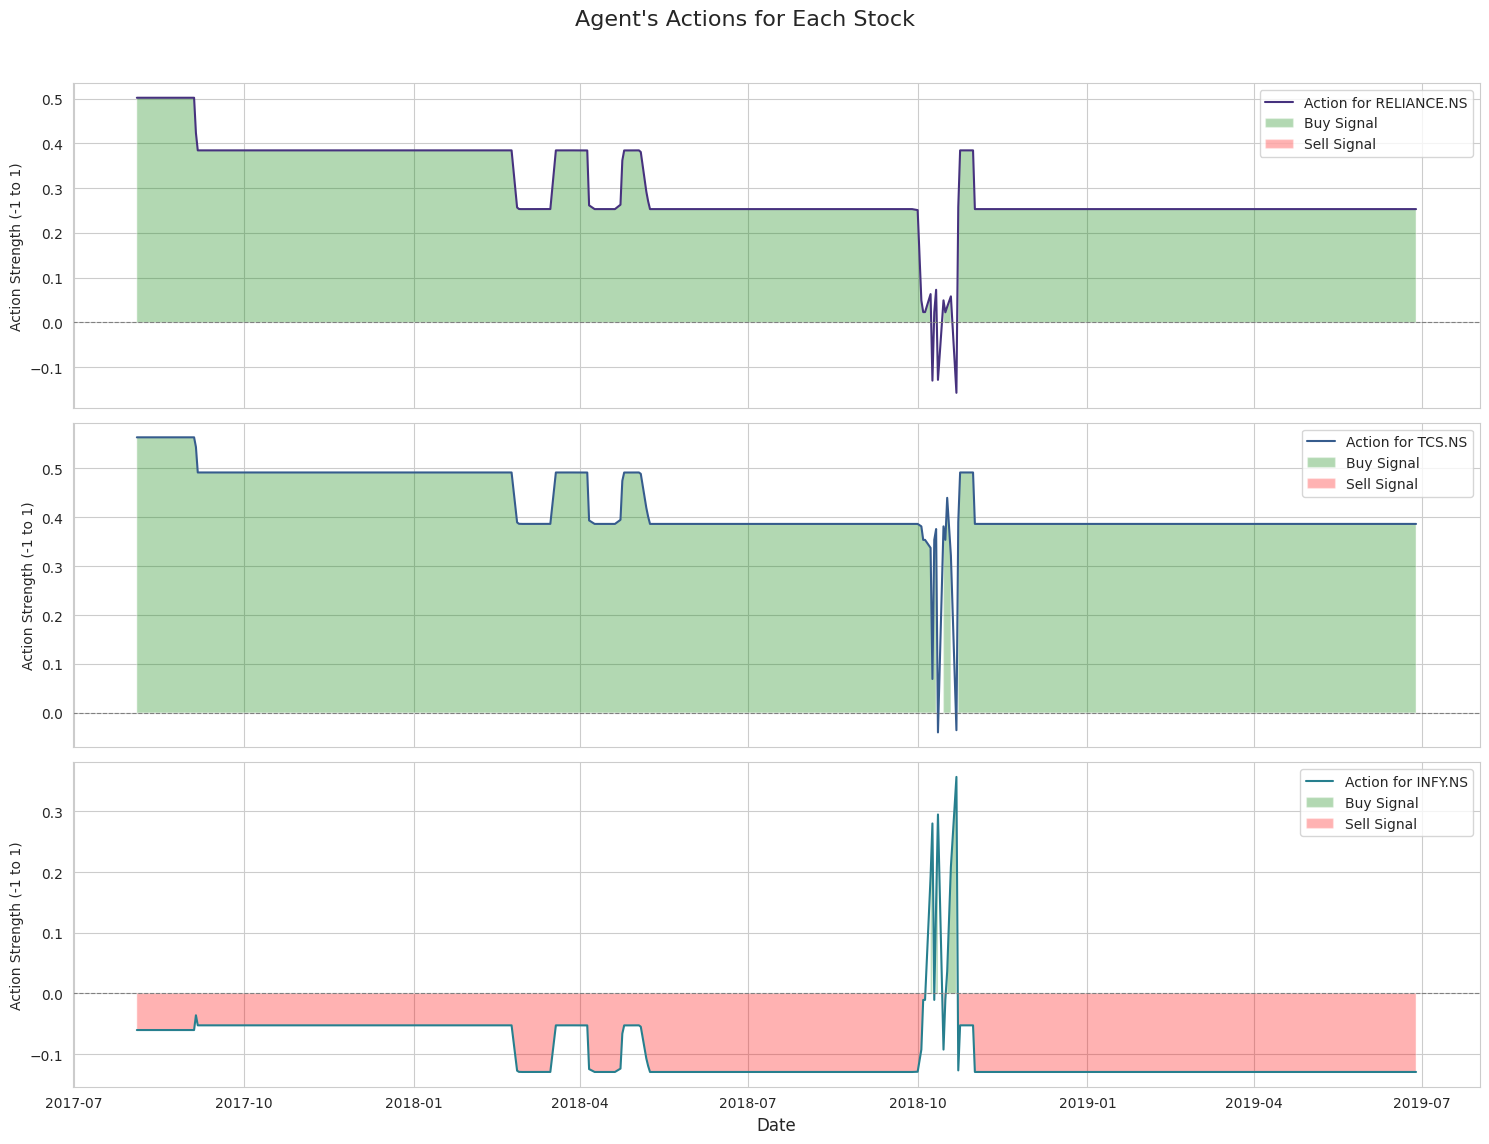

/tmp/ipython-input-2794210318.py:187: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


<Figure size 1500x700 with 0 Axes>

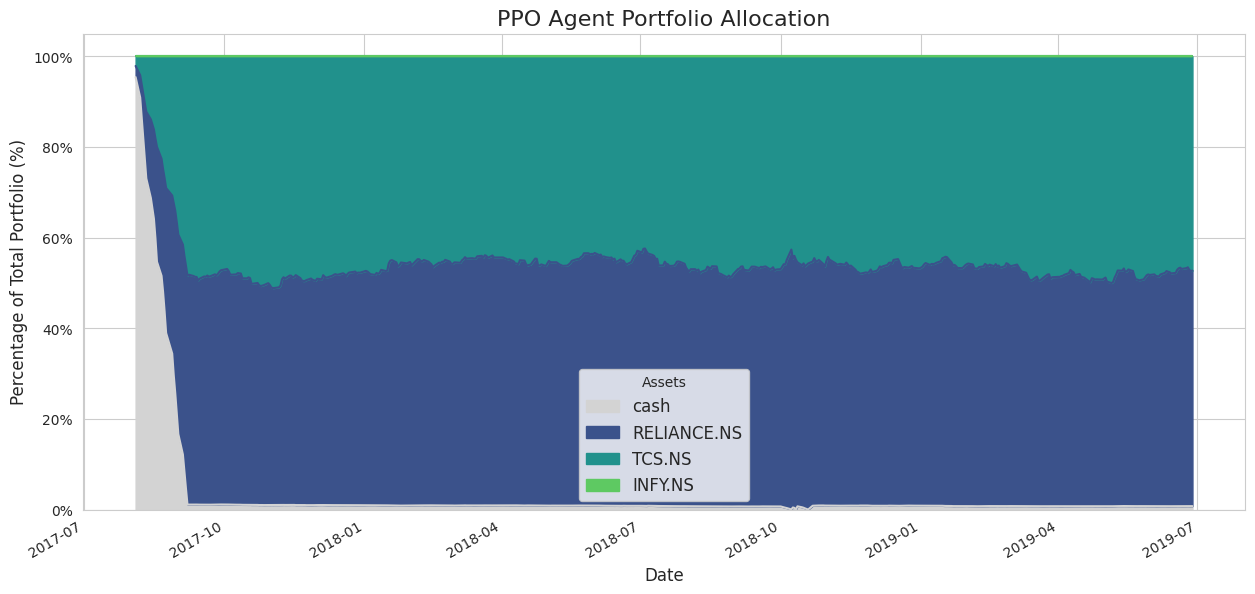

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 8]

# --- 1. MODIFY THE TRAIN FUNCTION TO RETURN THE TRAINED AGENT ---
def train(env, total_timesteps=200_000, n_steps=2048, batch_epochs=10, minibatch_size=64, gamma=0.99, gae_lambda=0.95, seed=42, device="cuda"):
    """
    Modified train function to return the trained agent for later evaluation.
    """
    set_seed(seed)
    obs, _ = env.reset(seed=seed)
    env.reset_episode()
    obs_dim = env.observation_space.shape[0]
    act_dim = env.action_space.shape[0]
    agent = PPO(obs_dim, act_dim, device=device)
    steps_collected = 0
    print("--- Starting Agent Training ---")
    while steps_collected < total_timesteps:
        roll = collect_rollout(env, agent, n_steps, obs, gamma)
        obs = roll.next_obs
        batch = make_batch(roll, gamma, gae_lambda)
        agent.update(batch, epochs=batch_epochs, minibatch_size=minibatch_size)
        steps_collected += n_steps
        env.update_episode()
        print(f"  Timesteps collected: {steps_collected}/{total_timesteps}")

    print("--- Training Complete ---")
    env.close()
    return agent


# --- 2. FUNCTION TO EVALUATE THE TRAINED AGENT ON TEST DATA ---
@torch.no_grad()
def evaluate_agent(env, agent, tickers):
    """
    Evaluate the agent on the environment and record performance metrics.
    """
    obs, info = env.reset()
    terminated, truncated = False, False

    # Store history
    portfolio_values = [env.initial_balance]
    actions_history = []
    asset_values = [] # To store cash and stock values

    while not (terminated or truncated):
        obs_t = torch.as_tensor(obs, dtype=torch.float32, device=agent.device).unsqueeze(0)
        # Use the mean of the policy distribution for deterministic actions
        mu, _, _ = agent.ac(obs_t)
        action = mu.cpu().numpy()[0]

        obs, reward, terminated, truncated, info = env.step(action)

        # Record data for plotting
        portfolio_values.append(info['portfolio_value'])
        actions_history.append(action)

        # Record asset allocation
        current_prices = env.df[env.df['date'] == env.unique_trade_dates[env.day_index-1]]['close'].values
        stock_value = np.sum(env.shares_held * current_prices)
        allocation = {'cash': env.balance}
        for i, ticker in enumerate(tickers):
            allocation[ticker] = env.shares_held[i] * current_prices[i]
        asset_values.append(allocation)


    # Create DataFrames from history
    dates = env.unique_trade_dates[1:len(portfolio_values)]
    portfolio_df = pd.DataFrame({'date': dates, 'portfolio_value': portfolio_values[1:]})

    actions_df = pd.DataFrame(actions_history, columns=tickers, index=dates)

    assets_df = pd.DataFrame(asset_values, index=dates)
    # Normalize asset values to show allocation percentage
    assets_df_percentage = assets_df.divide(assets_df.sum(axis=1), axis=0)


    return portfolio_df, actions_df, assets_df_percentage


# --- 3. FUNCTION FOR "BUY AND HOLD" BENCHMARK STRATEGY ---
def calculate_buy_and_hold(df, initial_balance, tickers):
    """
    Calculates the portfolio value of a simple Buy and Hold strategy.
    """
    unique_trade_dates = df['date'].unique()
    start_date = unique_trade_dates[0]
    end_date = unique_trade_dates[-1]

    # Investment equally distributed among stocks
    investment_per_stock = initial_balance / len(tickers)
    initial_prices = df[df['date'] == start_date].set_index('tic')['close']

    shares_bought = {}
    for tic in tickers:
        shares_bought[tic] = investment_per_stock / initial_prices.loc[tic]

    # Calculate portfolio value over time
    portfolio_values = []
    for date in unique_trade_dates:
        current_prices = df[df['date'] == date].set_index('tic')['close']
        current_value = 0
        for tic in tickers:
            current_value += shares_bought[tic] * current_prices.loc[tic]
        portfolio_values.append(current_value)

    benchmark_df = pd.DataFrame({
        'date': unique_trade_dates,
        'portfolio_value': portfolio_values
    })
    return benchmark_df

# --- 4. EXECUTION AND PLOTTING ---

# Instantiate the training environment (using the training data)
train_env = StockTradingEnv(
    df=df_train,
    stock_dim=STOCK_DIM,
    initial_balance=INITIAL_BALANCE,
    tech_indicator_list=INDICATORS,
    render_mode=None # Silent mode for faster training
)

# Train the agent
# Note: For a quick result, you can reduce total_timesteps (e.g., to 20000)
# A full training might take a while.
trained_ppo_agent = train(train_env, total_timesteps=50000, n_steps=len(df_train['date'].unique()))


# Instantiate the testing environment
test_env = StockTradingEnv(
    df=df_test,
    stock_dim=STOCK_DIM,
    initial_balance=INITIAL_BALANCE,
    tech_indicator_list=INDICATORS,
    render_mode=None
)

# Evaluate the agent
ppo_portfolio, ppo_actions, ppo_assets = evaluate_agent(test_env, trained_ppo_agent, tickers)

# Calculate benchmark
benchmark_portfolio = calculate_buy_and_hold(df_test, INITIAL_BALANCE, tickers)


# --- PLOT 1: Portfolio Value vs. Buy and Hold Benchmark ---
print("\n--- Generating Plots ---")
plt.figure(figsize=(15, 7))
plt.plot(ppo_portfolio['date'], ppo_portfolio['portfolio_value'], label='PPO Agent', color='royalblue')
plt.plot(benchmark_portfolio['date'], benchmark_portfolio['portfolio_value'], label='Buy and Hold Benchmark', color='darkorange', linestyle='--')
plt.title('PPO Agent Performance vs. Buy and Hold Benchmark on Test Data', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Portfolio Value ($)', fontsize=12)
plt.legend(fontsize=12)
plt.show()


# --- PLOT 2: Agent's Actions (Buy/Sell/Hold) ---
fig, axes = plt.subplots(len(tickers), 1, figsize=(15, 12), sharex=True)
fig.suptitle("Agent's Actions for Each Stock", fontsize=16)
for i, ticker in enumerate(tickers):
    axes[i].plot(ppo_actions.index, ppo_actions[ticker], label=f'Action for {ticker}', color=sns.color_palette("viridis")[i])
    axes[i].fill_between(ppo_actions.index, ppo_actions[ticker], 0, where=ppo_actions[ticker] > 0, facecolor='green', alpha=0.3, label='Buy Signal')
    axes[i].fill_between(ppo_actions.index, ppo_actions[ticker], 0, where=ppo_actions[ticker] < 0, facecolor='red', alpha=0.3, label='Sell Signal')
    axes[i].set_ylabel('Action Strength (-1 to 1)')
    axes[i].legend()
    axes[i].axhline(0, color='grey', linestyle='--', linewidth=0.8)

plt.xlabel('Date', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


# --- PLOT 3: Portfolio Asset Allocation ---
plt.figure(figsize=(15, 7))
# Use a color palette that is distinct
colors = ['lightgrey'] + sns.color_palette("viridis", len(tickers))
ppo_assets.plot(kind='area', stacked=True, figsize=(15, 7), color=colors)
plt.title('PPO Agent Portfolio Allocation', fontsize=16)
plt.ylabel('Percentage of Total Portfolio (%)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Assets', fontsize=12)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.show()